## Imports

In [1]:
#!pip install nltk

In [2]:
import numpy as np
import pandas as pd
import warnings

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA

## Configs

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 2000)


random_seed_nb = 99
pattern = r'[^\w\s]' #negacion de un caracter no presente en w (letras y numeros) ni s (espacios) 

## Functions

In [4]:
def stem_list(word_list):
    stem_result = [PorterStemmer().stem(word) for word in word_list]
    return stem_result


## Input data

In [5]:
edamam_flavor = pd.read_pickle('../data_discovery/edamam_flavor_dbs_nutrients.pkl')

In [6]:
similar_foods = pd.read_pickle('../data_discovery/similar_food_ingredients.pkl')
usda_foods = pd.read_csv('../data_discovery/all_branded_foods_usda.csv', index_col=0)
usda_foods = usda_foods[usda_foods.ingredients.notna()]

In [7]:
base_ingredients = pd.DataFrame()
base_ingredients['ingredients'] = pd.Series(similar_foods.index)
base_ingredients['ingredients_cleaned_list'] = base_ingredients.ingredients.str.lower().replace(pattern, '', regex=True).str.split(' ')
base_ingredients['stemmed_ingredients'] = base_ingredients.ingredients_cleaned_list.apply(stem_list)
base_ingredients['ingredients_cleaned'] = base_ingredients.stemmed_ingredients.str.join(' ')
base_ingredients['ingredients_for_search'] = ' ' + base_ingredients.ingredients_cleaned + ' '
base_ingredients.set_index('ingredients', inplace=True)

In [8]:
# Toma mucho tiempo
#usda_foods['ingredient_searchable'] = (
#    ' ' + 
#    usda_foods.ingredients\
#    .str.lower()\
#    .replace(pattern, '', regex=True)\
#    .str.split(' ')\
#    .apply(stem_list)\
#    .str.join(' ') +
#    ' ')

In [9]:
#usda_foods.to_csv('../data_discovery/all_branded_foods_usda_searchable.csv')
usda_foods = pd.read_csv('../data_discovery/all_branded_foods_usda_searchable.csv', index_col=0)

## data analysis

In [10]:
ingredients = base_ingredients.ingredients_for_search.to_dict()

In [11]:
#base_ingredients.ingredients_for_search.to_pickle('../data_discovery/processed/available_ingredients.pkl')

In [12]:
usda_ingredients_results = []
i = 0
for real_ingredient, search_ingredient in ingredients.items():
    usda_ingredient_results = usda_foods[usda_foods.ingredient_searchable.str.contains(search_ingredient)]
    usda_ingredient_results['ing'] = real_ingredient
    usda_ingredients_results.append(usda_ingredient_results)
    print(f'{i} {real_ingredient}', sep='; ')
    i+=1

0 Abalone
1 Abiyuch
2 Acerola
3 Acorn
4 Adzuki bean
5 Agar
6 Agave
7 Alaska blackfish
8 Alaska pollock
9 Alaska wild rhubarb
10 Albacore tuna
11 Alfalfa
12 Allspice
13 Almond
14 Alpinia
15 Amaranth
16 American butterfish
17 American shad
18 Anchovy
19 Anise
20 Annual wild rice
21 Apple
22 Apple Brandy
23 Apple Cider Vinegar
24 Apple Sauce
25 Apricot
26 Arabica coffee
27 Arrowhead
28 Arrowroot
29 Artichoke
30 Asafoetida
31 Ascidians
32 Asparagus
33 Atlantic croaker
34 Atlantic halibut
35 Atlantic herring
36 Atlantic mackerel
37 Atlantic menhaden
38 Atlantic pollock
39 Atlantic salmon
40 Atlantic wolffish
41 Avocado
42 Babaco
43 Babassu palm
44 Bagel
45 Bakery Products
46 Bamboo shoots
47 Banana
48 Barley
49 Bartlett Pear
50 Basil
51 Basmati Rice
52 Beans
53 Bearded seal
54 Beaver
55 Beef
56 Beef Processed
57 Beefalo
58 Beer
59 Beetroot
60 Beluga whale
61 Berry
62 Bilberry
63 Biscuit
64 Bison
65 Bitter Orange
66 Bittergourd
67 Black Tea
68 Black crowberry
69 Black huckleberry
70 Black sa

577 Spearmint
578 Spelt
579 Spinach
580 Spiny lobster
581 Spirulina
582 Spot croaker
583 Spread
584 Squab
585 Squid
586 Squirrel
587 Star Anise
588 Starfruit
589 Steller sea lion
590 Strawberry
591 Strawberry Jam
592 Striped bass
593 Striped mullet
594 Stuffing
595 Sturgeon
596 Sugar
597 Sugar substitute
598 Summer savory
599 Sweet Potato
600 Sweet custard
601 Sweetcorn
602 Swiss Cheese
603 Swordfish
604 Syrup
605 Tamarind
606 Tangerine
607 Tapioca pearl
608 Taro
609 Tarragon
610 Tartary buckwheat
611 Tea
612 Teff
613 Thyme
614 Tilefish
615 Tilsit Cheese
616 Tinda
617 Tofu
618 Tomato
619 Topping
620 Tortilla
621 Tortilla chip
622 Tostada
623 Trassi
624 Tree fern
625 Triticale
626 True frog
627 True seal
628 Truffle
629 Turbot
630 Turkey
631 Turmeric
632 Turnip
633 Ucuhuba
634 Vanilla
635 Vermouth
636 Vinegar
637 Vodka
638 Wakame
639 Walleye
640 Walnut
641 Walrus
642 Wasabi
643 Water
644 Water Chestnut
645 Watercress
646 Welsh onion
647 Wheat
648 Wheaten Bread
649 Whelk
650 Whey
651 Whi

In [13]:
usda_ingredients_repeated = pd.concat(usda_ingredients_results)

In [14]:
usda_ingredients_repeated.ing.value_counts()

ing
Salt                     1185315
Sugar                     942671
Water                     855454
Corn                      629974
Milk                      567207
Flour                     497756
Syrup                     453144
Wheat                     446473
Soybean                   352121
Garlic                    340801
Onion                     315884
Soybean Oil               249922
Vinegar                   243975
Pepper                    234916
Butter                    229411
Whey                      226982
Cocoa                     217309
Cream                     212197
Cheese                    194911
Egg                       193493
Canola Oil                181632
Tomato                    173870
Beans                     170761
Whiting                   169901
Rice                      167147
Malt                      142922
Chocolate                 141338
Potato                    136596
Barley                    132729
Vanilla                   131138
Coconu

In [15]:
usda_ingredients_repeated.ing.nunique()

512

In [16]:
usda_ingredients = usda_ingredients_repeated.groupby('fdc_id').agg(
    brand_owner = ('brand_owner', 'first'),
    ingredients = ('ingredients', 'first'),
    flavor_ingredients = ('ing', lambda x: list(x)),
    category = ('branded_food_category', 'first'),
    flavor_ingredients_count = ('ing', 'count'),
)

In [17]:
categs = usda_ingredients.category.value_counts()

In [18]:
categs_dict = {
    "Cheese":"cheese",
    "Cheese - Block": 'cheese',
    'Cheese/Cheese Substitutes': 'cheese',
    'Cheese - Speciality': 'cheese',
    "Breads & Buns": "bread",
    #'Dried Breads (Shelf Stable)': 'bread',
    "Bread": "bread",
    "Bread (Frozen)": "bread",
    'Bread (Shelf Stable)': 'bread',
    "Frozen Bread & Dough": "bread",
    "Yogurt":"yogurt",
    "Yogurt/Yogurt Substitutes":"yogurt",
    "Yogurt (Perishable)": "yogurt",
    'Yogurt/Yogurt Substitutes (Perishable)': 'yogurt',
    "Milk":"milk",
    "Plant Based Milk": "milk",
    'Milk/Milk Substitutes': 'milk',
    "Canned Vegetables":"vegetable",
    "Frozen Vegetables":"vegetable",
    'Vegetables  Unprepared/Unprocessed (Frozen)': 'vegetable',
    'Vegetables': 'vegetable',
    #"Pepperoni, Salami & Cold Cuts": "meat",
    "Sausages, Hotdogs & Brats": 'meat',
    #"Bacon, Sausages & Ribs": 'meat', 
    "Meat/Poultry/Other Animals  Unprepared/Unprocessed": "meat",
    "Canned Meat": "meat",
    "Other Meats":"meat",
    "Other Frozen Meats": 'meat',
    #"Poultry, Chicken & Turkey": "meat",
    #"Frozen Poultry, Chicken & Turkey": "meat",
    "Vegetarian Frozen Meats": "meat",
    "Meat/Poultry/Other Animals – Unprepared/Unprocessed": 'meat',
    'Chicken - Unprepared/Unprocessed':'meat',
    'Meat Substitutes': 'meat',
    'Frozen Meat': 'meat',
    'Salami / Cured Meat': 'meat',
    'Fresh Meat': 'meat',
    "Vegetable & Cooking Oils": 'oil',
    'Oils Edible': 'oil',
    'Oils Edible - Vegetable or Plant (Shelf Stable)': 'oil',
    'Fruit': 'fruit',
    'Canned Fruit': 'fruit',
    'Frozen Fruit': 'fruit',
    'Frozen Fruit & Fruit Juice Concentrates': 'fruit',
    'Fruits  Unprepared/Unprocessed (Frozen)': 'fruit',
    'Frozen Fish & Seafood':'seafood',
    'Frozen Fish/Seafood': 'seafood',
    'Fish  Unprepared/Unprocessed': 'seafood',
    "Fish – Unprepared/Unprocessed": 'seafood',
    'Canned Seafood':'seafood',
    'Shellfish Unprepared/Unprocessed': 'seafood',
    'Honey': 'honey',
    "Eggs & Egg Substitutes": 'egg',
    'Eggs/Eggs Substitutes': 'egg',
    'Eggs Products/Substitutes': 'egg',
    'Eggs': 'egg',
    #"Coffee": "coffee",
    #"Coffee/Tea/Substitutes": 'coffee',
    "Butter/Butter Substitutes": "butter",  
    'Butter & Spread': 'butter',
}

In [19]:
#del usda_ingredients['filtered_category']
usda_ingredients['filtered_category'] = usda_ingredients.category.map(categs_dict)

In [20]:
samples = []
size = 200
for categ in usda_ingredients[usda_ingredients.filtered_category.notnull()].filtered_category.unique():
    print(categ)
    for unique_categ in usda_ingredients[usda_ingredients.filtered_category==categ].category.unique():
        try:
            samples.append(usda_ingredients[(usda_ingredients.category==unique_categ) & (usda_ingredients.flavor_ingredients_count != 1)].sample(size, replace=True).reset_index().drop_duplicates('fdc_id').set_index('fdc_id'))
        except: 
            samples.append(usda_ingredients[(usda_ingredients.category==unique_categ)].sample(size, replace=True).reset_index().drop_duplicates('fdc_id').set_index('fdc_id'))

yogurt
oil
cheese
fruit
seafood
meat
bread
butter
milk
vegetable
honey
egg


In [21]:
sample_df = pd.concat(samples)
sample_df['str_flavor_ingredients'] = sample_df.flavor_ingredients.apply(sorted).astype('str')
sample_df.drop_duplicates(["category", "str_flavor_ingredients"], keep='first').shape[0]

2898

In [56]:
sample_df.shape

(5851, 7)

In [68]:
sample_df

,brand_owner,ingredients,flavor_ingredients,category,flavor_ingredients_count,filtered_category,str_flavor_ingredients
fdc_id,,,,,,,
761256,GENERAL MILLS SALES INC.,"LOWFAT BANANA SPLIT YOGURT (CULTURED PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, NONFAT MILK, MODIFIED CORN STARCH, KOSHER GELATIN, NATURAL FLAVOR, COLORED WITH TURMERIC EXTRACT, VITAMIN A ACETATE, VITAMIN D3), LACTIC ACID ESTERS OF MONO AND DIGLYCERIDES, NITROGEN.","[Banana, Corn, Gelatin, Milk, Sugar, Turmeric, Yogurt]",Yogurt/Yogurt Substitutes (Perishable),7,yogurt,"['Banana', 'Corn', 'Gelatin', 'Milk', 'Sugar', 'Turmeric', 'Yogurt']"
349996,GENERAL MILLS SALES INC.,"STRAWBERRY : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, STRAWBERRIES, MODIFIED CORN STARCH, KOSHER GELATIN, NATURAL FLAVOR, PECTIN, COLORED WITH CARMINE, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3. ORANGE CRÈME : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, MODIFIED CORN STARCH, KOSHER GELATIN, ORANGE JUICE CONCENTRATE, LIME JUICE CONCENTRATE, LEMON JUICE CONCENTRATE, NATURAL FLAVOR, COLORED WITH ANNATTO EXTRACT, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3.","[Corn, Gelatin, Lemon, Lime, Milk, Orange, Pectin, Strawberry, Sugar, Yogurt]",Yogurt/Yogurt Substitutes (Perishable),10,yogurt,"['Corn', 'Gelatin', 'Lemon', 'Lime', 'Milk', 'Orange', 'Pectin', 'Strawberry', 'Sugar', 'Yogurt']"
760578,GENERAL MILLS SALES INC.,"STRAWBERRY : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, STRAWBERRIES, MODIFIED CORN STARCH, KOSHER GELATIN, NATURAL FLAVOR, PECTIN, COLORED WITH CARMINE, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3. ORANGE CRÃˆME : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, MODIFIED CORN STARCH, KOSHER GELATIN, ORANGE JUICE CONCENTRATE, LIME JUICE CONCENTRATE, LEMON JUICE CONCENTRATE, NATURAL FLAVOR, COLORED WITH ANNATTO EXTRACT, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3.","[Corn, Gelatin, Lemon, Lime, Milk, Orange, Pectin, Strawberry, Sugar, Yogurt]",Yogurt/Yogurt Substitutes (Perishable),10,yogurt,"['Corn', 'Gelatin', 'Lemon', 'Lime', 'Milk', 'Orange', 'Pectin', 'Strawberry', 'Sugar', 'Yogurt']"
761248,GENERAL MILLS SALES INC.,"STRAWBERRY : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, STRAWBERRIES, MODIFIED CORN STARCH, KOSHER GELATIN, NATURAL FLAVOR, PECTIN, COLORED WITH CARMINE, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3 . RAINBOW SHERBET : PASTEURIZED GRADE A REDUCED FAT MILK, SUGAR, MODIFIED CORN STARCH, KOSHER GELATIN, COLORED WITH BEET JUICE CONCENTRATE AND PAPRIKA EXTRACT, NATURAL FLAVOR, YOGURT CULTURES (L. BULGARICUS, S. THERMOPHILUS, L. ACIDOPHILUS), VITAMIN A ACETATE, VITAMIN D3.","[Corn, Gelatin, Milk, Pectin, Strawberry, Sugar, Yogurt]",Yogurt/Yogurt Substitutes (Perishable),7,yogurt,"['Corn', 'Gelatin', 'Milk', 'Pectin', 'Strawberry', 'Sugar', 'Yogurt']"
349839,GENERAL MILLS SALES INC.,"HARVEST PEACH : CULTURED PASTEURIZED GRADE A LOW FAT MILK, SUGAR, PEACHES, MODIFIED CORN STARCH, KOSHER GELATIN, PECTIN, POTASSIUM SORBATE ADDED TO MAINTAIN FRESHNESS, CITRIC ACID, CALCIUM LACTATE, SODIUM CITRATE, CALCIUM CITRATE, COLORED WITH ANNATTO EXTRACT, NATURAL FLAVOR, VITAMIN A ACETATE, VITAMIN D3. STRAWBERRY : CULTURED PASTEURIZED GRADE A LOW FAT MILK, SUGAR, STRAWBERRIES, MODIFIED CORN STARCH, KOSHER GELATIN, CARRAGEENAN, NATURAL FLAVOR, CALCIUM LACTATE, POTASSIUM SORBATE ADDED TO MAINTAIN FRESHNESS, SODIUM CITRATE, GUAR GUM, COLORED WITH CARMINE, VITAMIN A ACETATE, VITAMIN D3.","[Corn, Gelatin, Milk, Peach, Pectin, Strawberry, Sugar]",Yogurt/Yogurt Substitutes (Perishable),7,yogurt,"['Corn', 'Gelatin', 'Milk', 'Peach', 'Pectin', 'Strawberry', 'Sugar']"
...,...,...,...,...,...,...,...
2525922,Cargill Poultry Products Div,"Whole Eggs, Water, Dry Whole Milk, Soybean Oil, Salt, Xanthan Gum, Citric Acid. CONTAINS: EGG, MILK","[Egg, M

In [22]:
columns_defined = [
    'taste',
    'functional_groups',
    'fooddb_flavor_profile',
    'supersweetdb_id',
    'fooddb_id',
    'common_name',
    'bitterdb_id',
    'super_sweet',
    'flavornet_id',
    'pubchem_id',
    'bitter',
    'iupac_name',
    'odor',
    'smile',
    'inchi',
    'cas_id',
    'flavor_profile',
    'fema_flavor_profile',
]

flavor_molecules_df_list = []

nutrition_facts_df_list = []

for row_index in range(edamam_flavor.shape[0]):
    df_temporal_index = edamam_flavor.iloc[row_index]
    flavor_molecules_df = pd.DataFrame(df_temporal_index.molecules)
    flavor_molecules_df['entity_alias_readable'] = df_temporal_index.entity_alias_readable
    flavor_molecules_df_list.append(flavor_molecules_df)
    nutrition_facts_df = pd.DataFrame(df_temporal_index.nutritional_info).iloc[-1:]
    nutrition_facts_df['entity_alias_readable'] = df_temporal_index.entity_alias_readable
    nutrition_facts_df_list.append(nutrition_facts_df)

In [23]:
nutrition_facts = pd.concat(nutrition_facts_df_list).set_index("entity_alias_readable").fillna(0)
flavor_molecules = pd.concat(flavor_molecules_df_list)[columns_defined + ['entity_alias_readable']]

entity_nutrition_facts = nutrition_facts.copy()

In [24]:
flavor_molecules['flavor_profile_list'] = flavor_molecules.fooddb_flavor_profile.str.split('@')
flavor_molecules['functional_group_list'] = flavor_molecules.functional_groups.str.split('@')
entity_flavor_profile = pd.DataFrame(flavor_molecules.explode('flavor_profile_list').groupby('entity_alias_readable').flavor_profile_list.apply(set).apply(list))
entity_functional_group = pd.DataFrame(flavor_molecules.explode('functional_group_list').groupby('entity_alias_readable').functional_group_list.apply(set).apply(list))
entity_flavor_molecules_name = pd.DataFrame(flavor_molecules.groupby('entity_alias_readable').common_name.apply(set).apply(list))

In [25]:
def get_entity_simplification_for_feature(entity_feature_df, feature, fill_value=np.nan):
    relation_df = entity_feature_df.explode(feature)
    relation_df['dummy'] = 1
    entity_feature = pd.pivot_table(
        relation_df, 
        index = 'entity_alias_readable',
        columns = feature, 
        aggfunc = 'count', 
        values = "dummy", 
        fill_value=fill_value
    )
    return entity_feature

def get_dim_reduction_from_simplification(simplified_df, feature_name, components=100):
    pca_obj = PCA(
        n_components=components,
        copy=True, 
        whiten=False,
        svd_solver='auto',
        tol=0.0, 
        iterated_power='auto',
        n_oversamples=10,
        power_iteration_normalizer='auto', 
        random_state=random_seed_nb
    )
    columns = [f'{feature_name}__{col}' for col in range(components)]
    dim_reduction = pd.DataFrame(pca_obj.fit_transform(simplified_df), index=simplified_df.index, columns=columns)
    return dim_reduction, pca_obj

In [26]:
entity_flavor_profile_reduced, entity_flavor_profile_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_flavor_profile, "flavor_profile_list", fill_value=0),
    feature_name='flavor_profile',
    components=50
)

entity_functional_group_reduced, entity_functional_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_functional_group, "functional_group_list", fill_value=0),
    feature_name='functional_group',
    components=20
)

entity_flavor_molecules_name_reduced, entity_flavor_molecules_name_transformer = get_dim_reduction_from_simplification(
    get_entity_simplification_for_feature(entity_flavor_molecules_name, "common_name", fill_value=0),
    feature_name='common_name',
    components=100
)

In [73]:
get_entity_simplification_for_feature(entity_functional_group, "functional_group_list", fill_value=0)

functional_group_list,,"1,2-diol","1,2-diphenol",acetal,alcohol,aldehyde,alkene,alkyl aryl ether,alkyl bromide,alkyl chloride,...,tertiary aliphatic amine (trialkylamine),tertiary aliphatic/aromatic amine (alkylarylamine),tertiary amine,tertiary carboxylic acid amide,thioacetal,thiocarboxylic acid derivative,thiocarboxylic acid ester,thiocyanate,thioether,thiol (sulfanyl compound)
entity_alias_readable,,,,,,,,,,,,,,,,,,,,,
Abalone,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Abiyuch,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Acerola,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Acorn,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Adzuki bean,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Agar,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Agave,0,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
Alaska blackfish,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska pollock,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def get_features_vector(ingredient_list):
    return pd.concat([
        entity_flavor_molecules_name_reduced.loc[ingredient_list].mean(), 
        entity_flavor_profile_reduced.loc[ingredient_list].mean(), 
        entity_functional_group_reduced.loc[ingredient_list].mean(),
        entity_nutrition_facts.loc[ingredient_list].mean()
    ])

In [72]:
entity_functional_group_reduced

,functional_group__0,functional_group__1,functional_group__2,functional_group__3,functional_group__4,functional_group__5,functional_group__6,functional_group__7,functional_group__8,functional_group__9,functional_group__10,functional_group__11,functional_group__12,functional_group__13,functional_group__14,functional_group__15,functional_group__16,functional_group__17,functional_group__18,functional_group__19
entity_alias_readable,,,,,,,,,,,,,,,,,,,,
Abalone,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Abiyuch,-1.989574,-0.213603,0.934939,-0.329601,-0.475442,0.009531,-0.140010,0.221066,0.564854,-0.279557,0.114826,-0.076729,0.081155,-0.472849,-0.129534,0.156666,-0.112009,0.174052,-0.110350,0.051076
Acerola,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Acorn,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Adzuki bean,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Agar,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Agave,-2.039179,-0.611634,0.315766,-0.338791,-0.189235,-0.181038,-0.036965,-0.138447,-0.033386,0.051726,-0.059429,-0.054861,-0.089354,0.082153,-0.000751,-0.000080,0.018456,-0.025631,0.017579,0.016981
Alaska blackfish,2.846841,-0.280180,0.424700,-0.687493,0.812844,0.562877,0.091611,0.110378,-0.710560,0.491227,-0.409147,-0.155179,0.001773,0.330371,-0.185128,0.229012,-0.482785,-0.210591,-0.489649,0.405422
Alaska pollock,2.515228,-0.545992,-0.273057,0.004323,-0.031940,-0.215069,-0.178994,-0.235151,0.139275,0.394739,0.146620,0.166772,0.216207,-0.140844,0.081129,-0.077440,-0.133896,-0.230516,0.088597,-0.015745


In [29]:
entity_flavor_molecules_name_reduced.to_pdickle('../data_discovery/processed/entity_flavor_molecules_name_reduced.pkl')
entity_flavor_profile_reduced.to_pickle('../data_discovery/processed/entity_flavor_profile_reduced.pkl')
entity_functional_group_reduced.to_pickle('../data_discovery/processed/entity_functional_group_reduced.pkl')
entity_nutrition_facts.to_pickle('../data_discovery/processed/entity_nutrition_facts.pkl')

In [30]:
#sample_df

In [31]:
features = sample_df.flavor_ingredients.apply(get_features_vector)

In [67]:
features.to_parquet('../data_discovery/processed/features_for_fdc_ids.parquet')

In [32]:
y = sample_df.filtered_category

In [33]:
import matplotlib.pyplot as plt
import os
import pickle
import shap
import seaborn as sns
import warnings
import shap

from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
train_x, test_x, train_y, test_y = train_test_split(
    features, y, 
    train_size=0.7, 
    random_state=random_seed_nb
)

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(train_x, train_y)

RandomForestClassifier()

In [37]:
pred = model.predict(test_x)#[:, 1]

In [38]:
test_values = pd.DataFrame()
test_values['y'] = test_y 
test_values['pred'] = pred
test_values.loc[test_values.y == test_values.pred, 'correct_prediction'] = 1
test_values.loc[test_values.y != test_values.pred, 'correct_prediction'] = 0

In [39]:
print(classification_report(test_values['y'], test_values['pred']))

              precision    recall  f1-score   support

       bread       0.90      0.97      0.93       206
      butter       0.95      0.85      0.90        86
      cheese       0.91      0.91      0.91       101
         egg       1.00      0.97      0.98        63
       fruit       0.99      0.95      0.97       108
       honey       0.94      0.98      0.96        49
        meat       0.93      0.92      0.92       423
        milk       0.85      0.81      0.83       129
         oil       0.96      0.97      0.96        88
     seafood       0.87      0.91      0.89       232
   vegetable       0.85      0.83      0.84       119
      yogurt       0.93      0.91      0.92       152

    accuracy                           0.91      1756
   macro avg       0.92      0.92      0.92      1756
weighted avg       0.91      0.91      0.91      1756



In [55]:
y.shape[0]**2, y.shape

(34234201, (5851,))

In [116]:
print(classification_report(test_values['y'], test_values['pred']))

              precision    recall  f1-score   support

       bread       0.81      0.92      0.86        52
      butter       0.85      0.82      0.84        28
      cheese       0.94      0.91      0.93        34
         egg       1.00      1.00      1.00        21
       fruit       0.86      0.94      0.90        33
       honey       0.92      0.92      0.92        13
        meat       0.89      0.87      0.88       116
        milk       0.88      0.76      0.82        38
         oil       0.96      0.83      0.89        29
     seafood       0.83      0.89      0.86        79
   vegetable       0.93      0.78      0.85        32
      yogurt       0.85      0.91      0.88        44

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.88      0.88      0.88       519



In [42]:
t = y.reset_index()

t['fdc_id2'] = [y.reset_index().fdc_id.to_list()] * y.reset_index().shape[0]

similarity = t.drop("fdc_id2", axis=1).merge(t.explode("fdc_id2"), left_on='fdc_id', right_on='fdc_id2', how='inner')

similarity['similar'] = (similarity.filtered_category_x == similarity.filtered_category_y).astype('int')

similarity = similarity.rename(columns={'fdc_id_x': 'fdc_id_source', 'fdc_id_y':'fdc_id_target'})[['fdc_id_source', 'fdc_id_target', 'similar']]

In [74]:
similarity

,fdc_id_source,fdc_id_target,similar
0,761256,761256,1
1,761256,349996,1
2,761256,760578,1
3,761256,761248,1
4,761256,349839,1
...,...,...,...
34234196,2457076,2525922,1
34234197,2457076,2525926,1
34234198,2457076,2492686,1
34234199,2457076,2525925,1


In [43]:
similarity_sample = similarity.sample(frac=0.1, random_state=random_seed_nb)

In [75]:
similarity_sample

,fdc_id_source,fdc_id_target,similar
10844922,1198556,2272070,0
24575728,2232973,1940896,0
27284051,1260418,2552668,0
20423090,767488,1510065,1
8195434,2506556,1175590,0
...,...,...,...
7856603,448498,2518354,0
26138478,1803058,1460188,0
33251805,1418949,1650645,0
18975320,1637562,741242,0


In [61]:
#similarity.to_parquet('../data_discovery/processed/all_similar_combinations.parquet')

In [44]:
similarity_dataset = similarity_sample.merge(
    features.reset_index(), left_on='fdc_id_source', right_on='fdc_id'
).drop('fdc_id', axis=1).merge(features.reset_index(), left_on='fdc_id_target', right_on='fdc_id').drop('fdc_id', axis=1)

In [45]:
non_predictor_columns = ['similar']
id_columns = ['fdc_id_source', 'fdc_id_target']
predictors = similarity_dataset.drop(non_predictor_columns, axis=1)
target = similarity_dataset.similar # Utilizamos la columna 'similar' como variable de respuesta

In [65]:
train_test_fdc_ids = similarity_dataset[id_columns]
train_test_fdc_ids.to_parquet('../data_discovery/processed/fdc_ids_for_train_test.parquet')

In [46]:
train_index, test_index = train_test_split(
    predictors['fdc_id_source'].unique(), 
    train_size=0.7, 
    random_state=random_seed_nb,
)

# Queremos que lo que vea el modelo para entrenar NO esté de 
# ninguna manera en el conjunto de pruebas.
real_train_index = predictors[
    (predictors['fdc_id_source'].isin(train_index)) & 
    (~predictors['fdc_id_target'].isin(test_index))
].index

# Queremos también que lo que vea el modelo para evaluar NO esté 
# de ninguna manera incluido en el conjunto de entrenamiento.
real_test_index = predictors[
    (predictors['fdc_id_source'].isin(test_index)) &
    (~predictors['fdc_id_target'].isin(train_index))
].index

In [59]:
x_train.shape

(1674846, 408)

In [47]:
x_train = predictors.loc[real_train_index].drop(id_columns, axis=1)#.fillna(-100)
y_train = target.loc[real_train_index]

x_test = predictors.loc[real_test_index].drop(id_columns, axis=1)#.fillna(-100)
y_test = target.loc[real_test_index]

In [48]:
# Salvemos los conjuntos de datos para predecir y para evaluar

# train
x_train.to_parquet("../data_discovery/processed/x_train.parquet")
pd.DataFrame(y_train).to_parquet("../data_discovery/processed/y_train.parquet")

# test
x_test.to_parquet("../data_discovery/processed/x_test.parquet")
pd.DataFrame(y_test).to_parquet("../data_discovery/processed/y_test.parquet")

In [60]:
x_train.shape, x_test.shape

((1674846, 408), (307924, 408))

In [49]:
model_sim = RandomForestClassifier()
model_sim.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
pred = model_sim.predict_proba(x_test)[:, 1]
results = pd.DataFrame()
results['pred'] = pred
results.set_index(x_test.index, inplace=True)
results['similar'] = y_test
roc_auc_score(y_test, pred)

0.9752394605125936

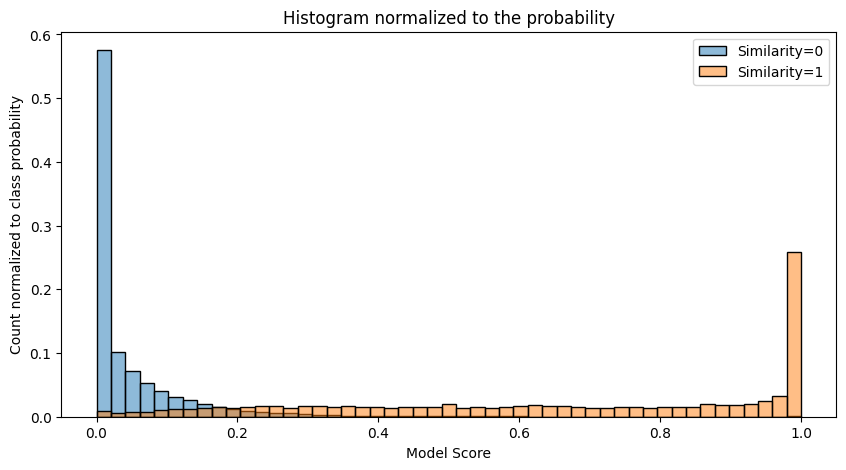

In [52]:
steps = 25
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(pred[y_test==0], bins=np.linspace(0,1,50), stat="probability", alpha=0.5, label='Similarity=0')
sns.histplot(pred[y_test==1], bins=np.linspace(0,1,50), stat="probability", alpha=0.5, label='Similarity=1')
plt.legend()
plt.title("Histogram normalized to the probability")
plt.xlabel("Model Score")
plt.ylabel("Count normalized to class probability")
plt.show()

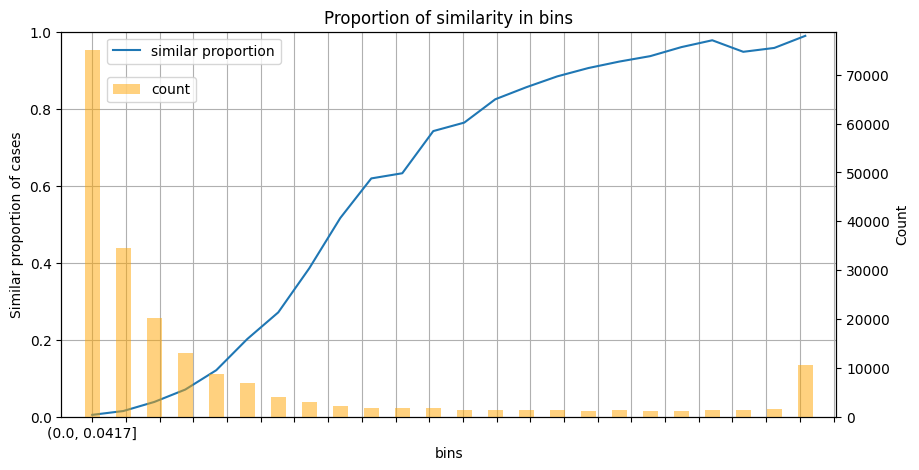

In [53]:
results['bins'] = pd.cut(results.pred, bins=np.linspace(0,1,steps))
fig, ax = plt.subplots(figsize=(10,5))
results.groupby("bins").similar.mean().plot(ax=ax, label='similar proportion')
ax.set_title("Proportion of similarity in bins")
ax.set_ylim(0,1)
ax.grid()
ax2 = plt.twinx(ax)
results.groupby('bins').similar.count().plot(ax=ax2, kind='bar', color='orange', alpha=0.5, label='count')
ax.set_xticks(np.linspace(0,steps,steps-1))
ax2.set_xlim(-1,steps-1)
ax2.set_ylabel('Count')
ax.set_ylabel('Similar proportion of cases')
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.9))

plt.show()

In [54]:
model_path = "../models/first_model.pkl"

with open(model_path, "wb") as file:
    pickle.dump(model_sim, file)